#**Gaming and Mental Health - EDA and Preprocessing Pipelines**

**Oscar Ivanovich Avila Chiu 35676**

En este notebook se llevará a cabo un análisis integral de un conjunto de datos que examina el comportamiento de los jugadores (gaming behavior) y su impacto potencial en los patrones de sueño y el estilo de vida diario. El proyecto seguirá un flujo de trabajo de ciencia de datos completo: desde el Análisis Exploratorio de Datos (EDA) y el Preprocesamiento, hasta el entrenamiento de un modelo de aprendizaje automático, su exportación y posterior integración en una aplicación móvil desarrollada con Flutter.

El dataset incluye detalles demográficos, duración de las sesiones de juego, géneros preferidos e indicadores relacionados con el sueño. El objetivo principal es explorar y predecir patrones entre el juego excesivo y factores de estilo de vida como la calidad y la interrupción del sueño. A diferencia de análisis previos, este proyecto busca transformar estas perspectivas en una herramienta funcional para el usuario final mediante una interfaz móvil.

El dataset fue obtenido desde la plataforma Kaggle, y se encuentra disponible en el siguiente enlace:
https://www.kaggle.com/datasets/shaistashahid/gaming-and-mental-health

A continuación, iniciaremos con la importación de librerías y la carga de datos para dar el primer paso: el EDA.

##**EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

data = pd.read_csv('gaming.csv')
data

,record_id,age,gender,daily_gaming_hours,game_genre,primary_game,gaming_platform,sleep_hours,sleep_quality,sleep_disruption_frequency,...,continued_despite_problems,eye_strain,back_neck_pain,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gaming_addiction_risk_level
0,GD0001,17,Male,11.1,Mobile Games,Clash of Clans,PC,3.7,Very Poor,Sometimes,...,True,True,False,6.8,3.7,7,1.3,383.70,3,Severe
1,GD0002,21,Male,3.0,MOBA,Dota 2,PC,7.2,Fair,Rarely,...,False,False,False,0.4,8.5,2,10.7,46.64,1,Low
2,GD0003,23,Male,7.6,FPS,CS:GO,Multi-platform,4.4,Fair,Often,...,True,False,True,1.8,7.1,5,3.2,100.81,6,Severe
3,GD0004,20,Female,7.2,RPG,Skyrim,Multi-platform,5.1,Fair,Often,...,False,True,True,0.2,5.2,4,9.1,51.60,7,High
4,GD0005,18,Male,6.8,Battle Royale,Apex Legends,PC,3.4,Poor,Never,...,False,False,False,0.5,6.1,4,4.5,32.57,1,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,GD0996,15,Female,8.6,Strategy,Age of Empires,PC,4.1,Very Poor,Always,...,True,True,True,1.9,7.5,6,2.4,426.54,3,Severe
996,GD0997,18,Male,5.4,MMO,Elder Scrolls Online,Multi-platform,6.5,Fair,Never,...,False,True,False,2.1,7.7,1,10.9,83.71,7,Low
997,GD0998,23,Male,7.3,RPG,Skyrim,PC,3.9,Insomnia,Rarely,...,False,False,True,0.5,8.1,5,6.7,88.60,5,High
998,GD0999,18,Male,3.1,Strategy,StarCraft II,Console,8.2,Fair,Sometimes,...,False,False,False,0.8,8.4,1,12.7,22.02,8,Low


###**Información básica y estadística**

Se utiliza el método .info() para obtener una mejor comprensión del conjunto de datos, ya que permite identificar el número de registros no nulos y el tipo de dato correspondiente a cada columna.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   record_id                         1000 non-null   object 
 1   age                               1000 non-null   int64  
 2   gender                            1000 non-null   object 
 3   daily_gaming_hours                1000 non-null   float64
 4   game_genre                        1000 non-null   object 
 5   primary_game                      1000 non-null   object 
 6   gaming_platform                   1000 non-null   object 
 7   sleep_hours                       1000 non-null   float64
 8   sleep_quality                     1000 non-null   object 
 9   sleep_disruption_frequency        1000 non-null   object 
 10  academic_work_performance         1000 non-null   object 
 11  grades_gpa                        754 non-null    float64
 12  work_pr

De manera similar, se utiliza el método .describe() para obtener estadísticas descriptivas de las variables numéricas del conjunto de datos. En este caso, el resultado se transpone con el objetivo de mejorar la legibilidad y facilitar la interpretación de los valores obtenidos.

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.475000,4.116105,13.00,18.0000,20.000,22.0000,35.00
daily_gaming_hours,1000.0,6.151400,2.867194,0.50,4.1000,6.000,8.0250,15.10
sleep_hours,1000.0,5.738100,1.441213,3.00,4.8000,5.700,6.6000,9.00
grades_gpa,754.0,2.518037,0.872312,1.01,1.7600,2.530,3.2800,4.00
work_productivity_score,674.0,5.394659,2.898742,1.00,3.0000,5.000,8.0000,10.00
weight_change_kg,1000.0,1.513400,1.432212,0.00,0.4000,1.100,2.1000,8.90
exercise_hours_weekly,1000.0,6.945900,1.805027,0.70,5.7000,7.000,8.2000,11.50
social_isolation_score,1000.0,3.872000,2.091409,1.00,2.0000,4.000,5.0000,10.00
face_to_face_social_hours_weekly,1000.0,7.654500,3.751954,0.00,5.0000,8.000,10.4000,16.70
monthly_game_spending_usd,1000.0,105.219730,113.886768,0.10,32.5925,66.405,126.2425,499.27


En total, el conjunto de datos cuenta con 27 columnas, las cuales describen características demográficas, hábitos de juego, indicadores de salud física y mental, y factores de estilo de vida:
Variables de Identificación y Demográficas

* record_id: Identificador único para cada registro.
* age: Edad del participante.
* gender: Género del participante.

Comportamiento de Juego (Gaming)

* daily_gaming_hours: Número de horas dedicadas al juego diariamente.
* game_genre: Género de videojuegos preferido.
* primary_game: Título del juego principal al que juega el usuario.
* gaming_platform: Plataforma utilizada para jugar (PC, consola, móvil, etc.).
* years_gaming: Años de experiencia como jugador.
* monthly_game_spending_usd: Gasto mensual en videojuegos en dólares.

Salud, Sueño y Bienestar
* sleep_hours: Horas de sueño promedio por día.
* sleep_quality: Calidad percibida del sueño.
* sleep_disruption_frequency: Frecuencia con la que se interrumpe el sueño.
* mood_state: Estado de ánimo general del participante.
* mood_swing_frequency: Frecuencia de cambios bruscos de humor.
* withdrawal_symptoms: Presencia de síntomas de abstinencia al no jugar (booleano).
* loss_of_other_interests: Pérdida de interés en otras actividades (booleano).
* continued_despite_problems: Continuación del juego a pesar de problemas detectados (booleano).

Impacto Social y Productividad
* academic_work_performance: Percepción del desempeño académico o laboral.
* grades_gpa: Promedio de calificaciones (presenta valores nulos).
* work_productivity_score: Puntaje de productividad laboral (presenta valores nulos).
* social_isolation_score: Puntaje que mide el nivel de aislamiento social.
* exercise_hours_weekly: Horas de actividad física a la semana.

Variable Objetivo
* gaming_addiction_risk_level: Nivel de riesgo de adicción al juego (Low, Moderate, High, Severe). Esta es la variable que el modelo intentará predecir, planteando un problema de clasificación.

Para el análisis y la construcción del modelo, utilizaremos gaming_addiction_risk_level como variable objetivo. Todas las demás columnas se consideran variables explicativas, aunque durante el preprocesamiento evaluaremos si columnas como record_id o primary_game deben ser descartadas por su alta cardinalidad o falta de valor predictivo.

###**Visualización de la distribución de variables numéricas**

Estas variables representan características cuantitativas relacionadas con el comportamiento de juego, hábitos de sueño, salud física y factores sociales de los participantes. Muchas de ellas pueden tener un impacto directo en el nivel de riesgo de adicción al gaming.

En este análisis se consideran las variables numéricas continuas y discretas que describen intensidad de juego, bienestar físico y social. Aunque algunas variables estén representadas como enteros, no se excluyen del análisis, ya que todas corresponden a valores cuantitativos relevantes para el problema de clasificación multiclase.

Para la visualización de las distribuciones se utiliza la librería seaborn, creando histogramas acompañados de estimaciones de densidad para cada variable numérica seleccionada.

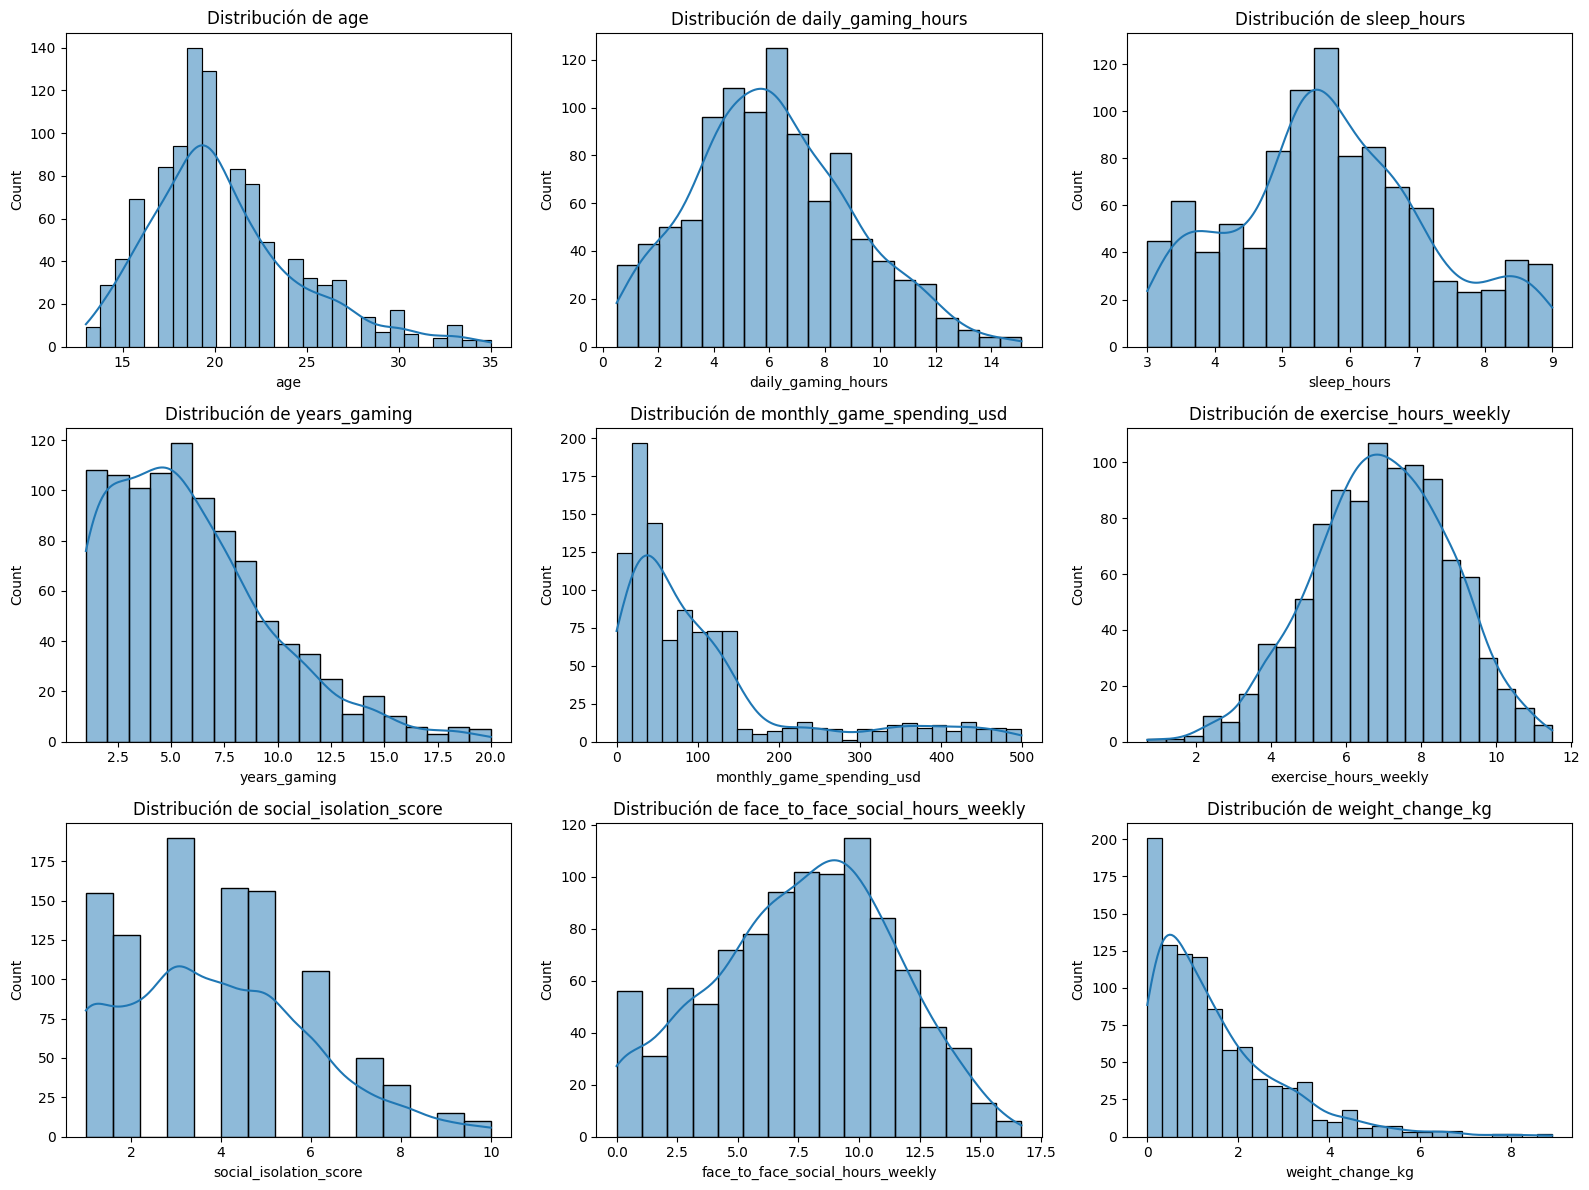

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'age',
    'daily_gaming_hours',
    'sleep_hours',
    'years_gaming',
    'monthly_game_spending_usd',
    'exercise_hours_weekly',
    'social_isolation_score',
    'face_to_face_social_hours_weekly',
    'weight_change_kg'
]

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data=data[col], kde=True, ax=ax)
    ax.set_title(f'Distribución de {col}')

fig.tight_layout()
plt.show()

###**Visualización de variables categóricas**

A continuación, se visualizarán las distribuciones de las variables categóricas del conjunto de datos mediante gráficos de barras. Este tipo de visualización permite observar la frecuencia de cada categoría dentro de cada variable, lo cual es útil para identificar posibles desbalances y comprender mejor la composición del dataset.

Para este análisis se seleccionan variables categóricas relevantes relacionadas con el comportamiento de juego, calidad del sueño y estado emocional. Algunas columnas como primary_game no se incluyen debido a su alta cardinalidad, lo que podría dificultar la interpretación visual y aportar poco valor en esta etapa del EDA.

Las variables seleccionadas presentan una cardinalidad adecuada y permiten obtener una visión clara de la distribución de los participantes en cada categoría.

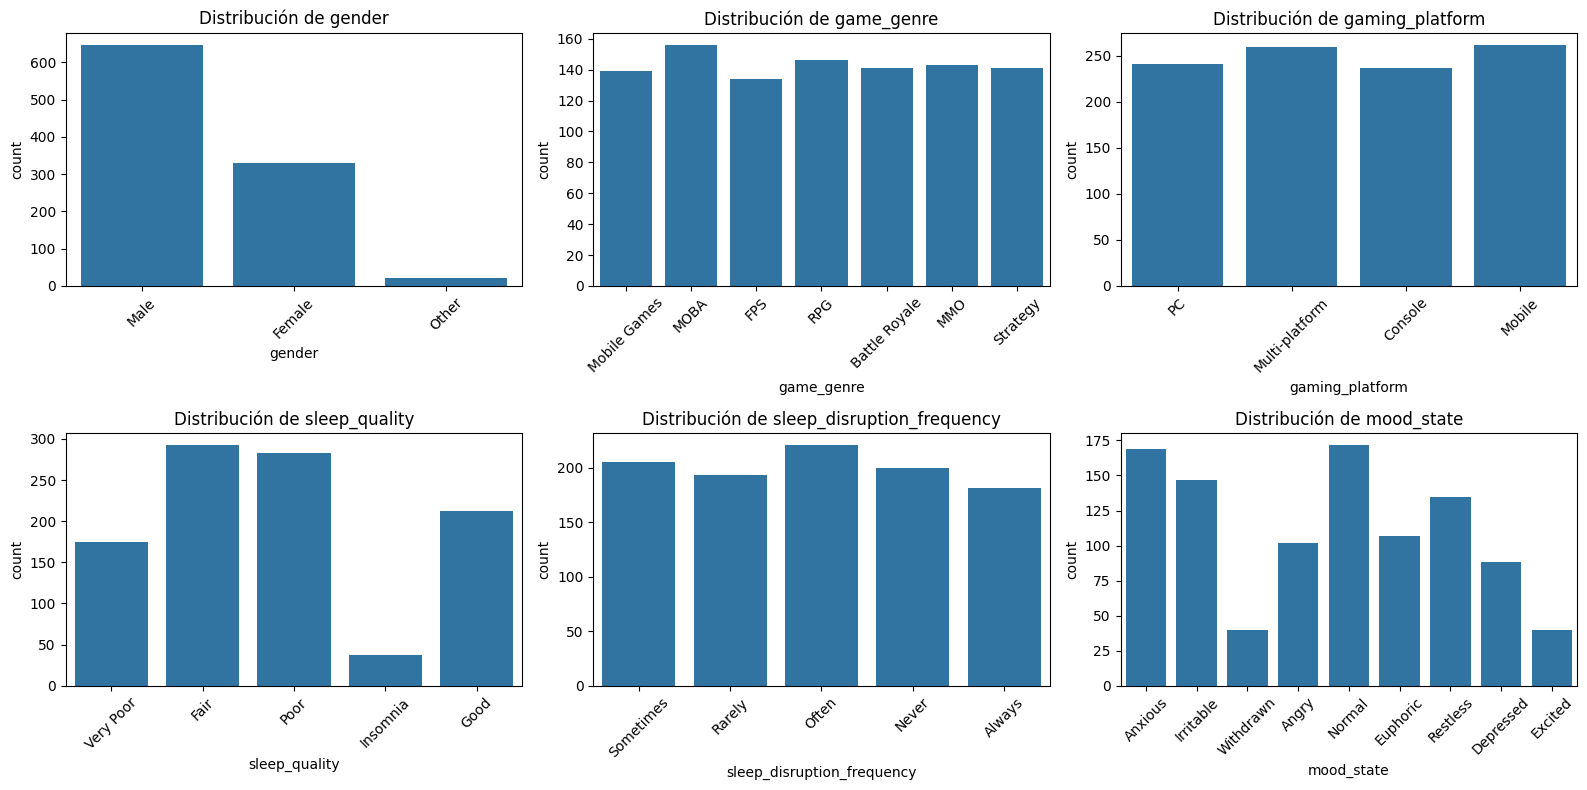

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'gender',
    'game_genre',
    'gaming_platform',
    'sleep_quality',
    'sleep_disruption_frequency',
    'mood_state'
]

fig, axs = plt.subplots(2, 3, figsize=(16, 8))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

###**Distribución de la variable objetivo**

Finalmente, se visualizará la distribución de la variable objetivo gaming_addiction_risk_level con el fin de comprender cómo se distribuyen los distintos niveles de riesgo de adicción al gaming dentro del conjunto de datos. Este análisis permite identificar posibles desbalances entre clases, lo cual es especialmente importante en problemas de clasificación, ya que puede influir directamente en el rendimiento del modelo.

Dado que gaming_addiction_risk_level es una variable categórica con cuatro niveles de riesgo, se utilizará un gráfico de barras para representar la frecuencia de cada categoría.

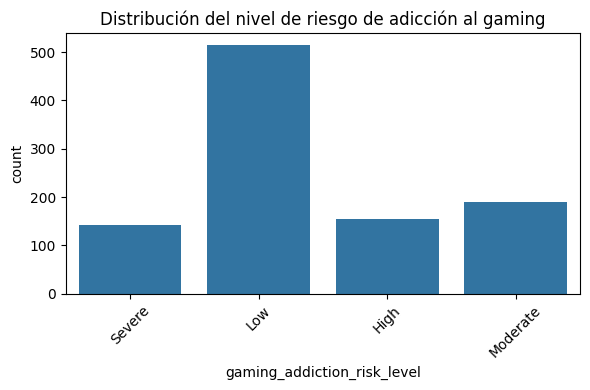

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='gaming_addiction_risk_level')
plt.title('Distribución del nivel de riesgo de adicción al gaming')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###**Relación entre variables numéricas y nivel de riesgo de adicción**

En esta sección se analizará la relación entre algunas variables numéricas relevantes y la variable objetivo gaming_addiction_risk_level.

El objetivo es observar si existen diferencias claras en las distribuciones de variables como horas de juego, horas de sueño o aislamiento social entre los distintos niveles de riesgo. Este análisis permite identificar patrones que podrían ser útiles para el modelo de clasificación.

Dado que la variable objetivo es categórica y las variables explicativas son numéricas, se utilizarán diagramas de caja para visualizar cómo varía cada variable según el nivel de riesgo.

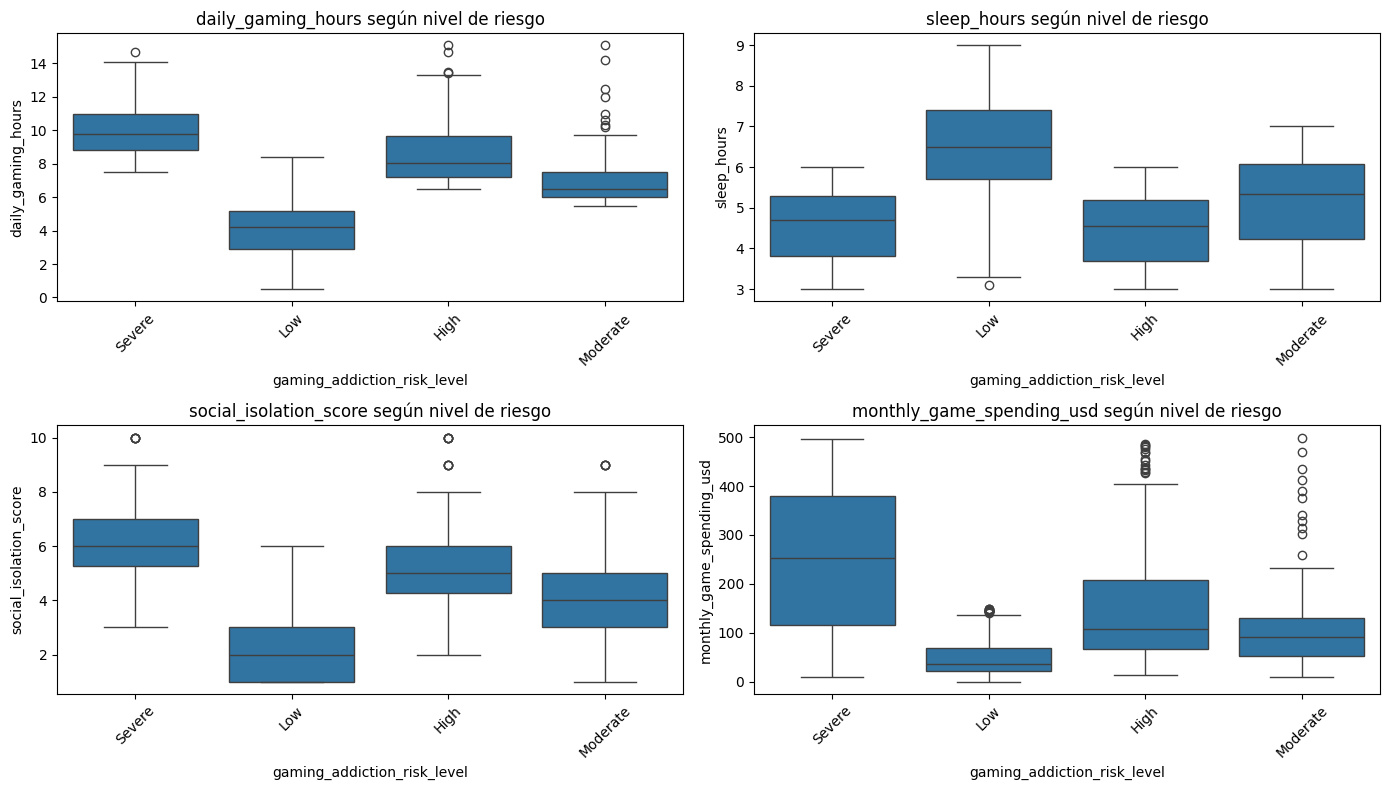

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'daily_gaming_hours',
    'sleep_hours',
    'social_isolation_score',
    'monthly_game_spending_usd'
]

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(data=data, x='gaming_addiction_risk_level', y=col, ax=ax)
    ax.set_title(f'{col} según nivel de riesgo')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


El análisis bivariado confirma que el riesgo de adicción severo está estrechamente ligado a una disrupción de los hábitos saludables:
* Intensidad y Sueño: Existe una clara correlación inversa; mientras los usuarios de bajo riesgo juegan menos de 4 horas y duermen 7-8 horas, los de riesgo severo promedian 10 horas de juego y apenas 4-5 horas de sueño.
* Impacto Social: El sentimiento de aislamiento social se triplica en los niveles críticos, alcanzando una mediana de 6 puntos frente a los 2 puntos del grupo de bajo riesgo.
* Factor Económico: El gasto mensual funciona como un fuerte diferenciador; el riesgo alto y severo suele superar los 250 USD mensuales y presenta múltiples valores atípicos, sugiriendo una falta de control en el gasto frente al consumo moderado (<100 USD) del nivel bajo.

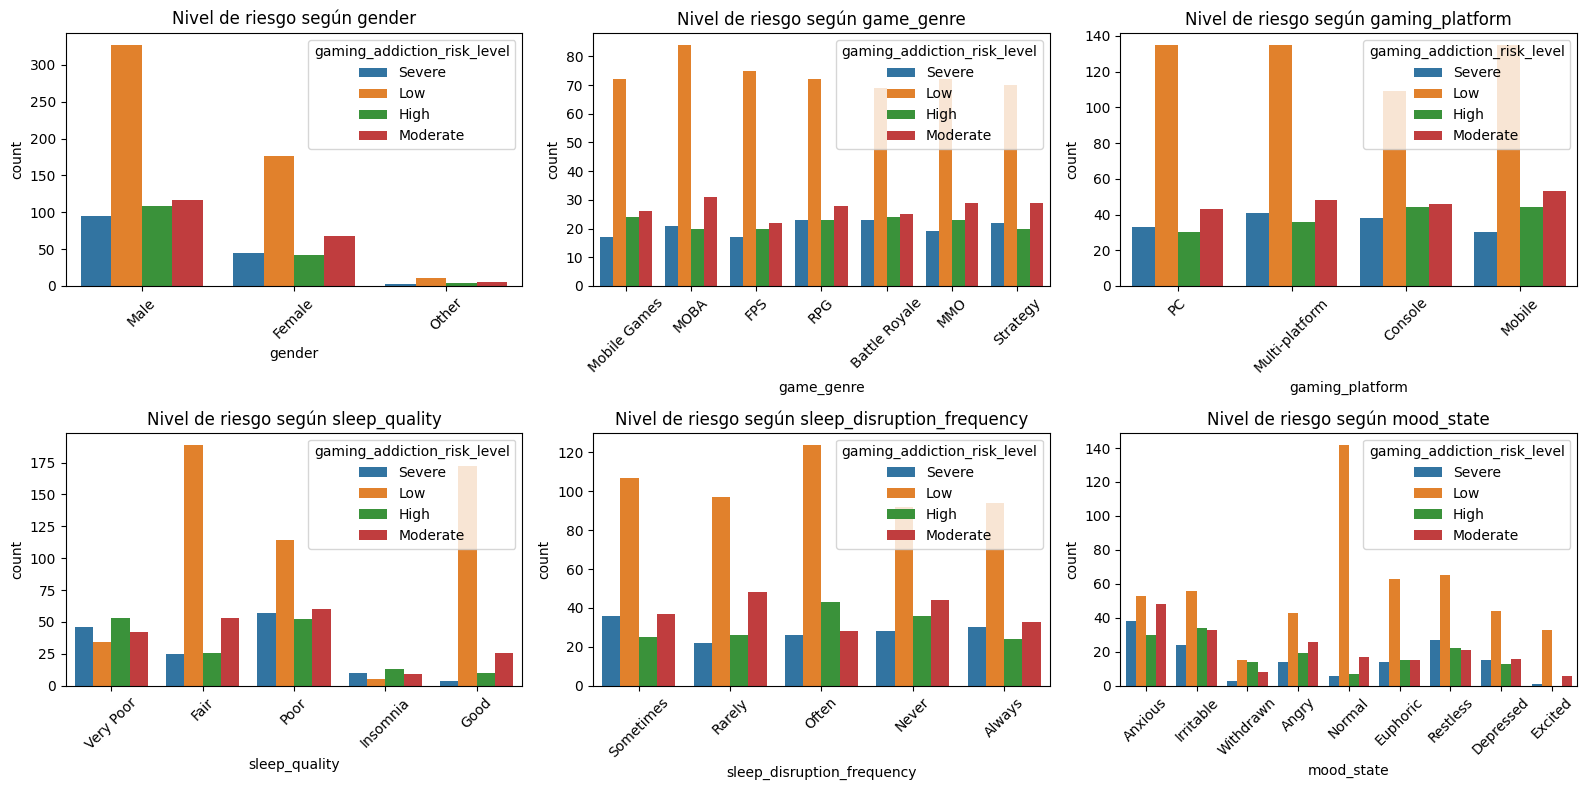

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'gender',
    'game_genre',
    'gaming_platform',
    'sleep_quality',
    'sleep_disruption_frequency',
    'mood_state'
]


fig, axs = plt.subplots(2, 3, figsize=(16, 8))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(
        data=data,
        x=col,
        hue='gaming_addiction_risk_level',
        ax=ax
    )
    ax.set_title(f'Nivel de riesgo según {col}')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

El análisis visual de las variables categóricas permite identificar segmentos de usuarios con mayor vulnerabilidad al riesgo de adicción:
* Género y Plataforma: Se observa una mayor prevalencia de usuarios masculinos en la muestra, quienes también presentan un volumen superior de casos en niveles de riesgo "Severe" y "High". En cuanto a plataformas, el uso de PC y Multi-platform destaca ligeramente en los niveles de riesgo más altos en comparación con usuarios exclusivos de dispositivos móviles.
* Género de Juego: Los géneros RPG y Strategy muestran una distribución de riesgo más equitativa entre sus categorías, mientras que en géneros competitivos como MOBA y FPS, el volumen de usuarios con riesgo bajo es dominante, aunque mantienen una base constante de usuarios en riesgo severo.
* Calidad de Sueño y Salud Mental: Existe una relación crítica entre la salud percibida y el riesgo. Los usuarios con calidad de sueño "Very Poor" o "Poor" tienen una proporción significativamente mayor de riesgo "Severe" y "High". Por el contrario, aquellos con calidad "Good" pertenecen casi en su totalidad al nivel de riesgo bajo.
* Estado de Ánimo (Mood State): Los estados de ánimo negativos como "Anxious" e "Irritable" están fuertemente asociados a los niveles de riesgo más elevados. En contraste, los usuarios que reportan un estado de ánimo "Normal" se concentran masivamente en la categoría de bajo riesgo de adicción.

###**Matriz de correlación entre variables numéricas**

En esta sección se analizará la relación lineal entre las variables numéricas del conjunto de datos mediante una matriz de correlación.

El objetivo es identificar posibles relaciones fuertes entre variables, así como detectar multicolinealidad que podría afectar el rendimiento de algunos modelos de clasificación. La correlación toma valores entre -1 y 1, donde valores cercanos a 1 indican relación positiva fuerte, valores cercanos a -1 indican relación negativa fuerte y valores cercanos a 0 indican poca o ninguna relación lineal.

Este análisis es útil para comprender cómo se relacionan factores como las horas de juego, horas de sueño, aislamiento social y gasto mensual.

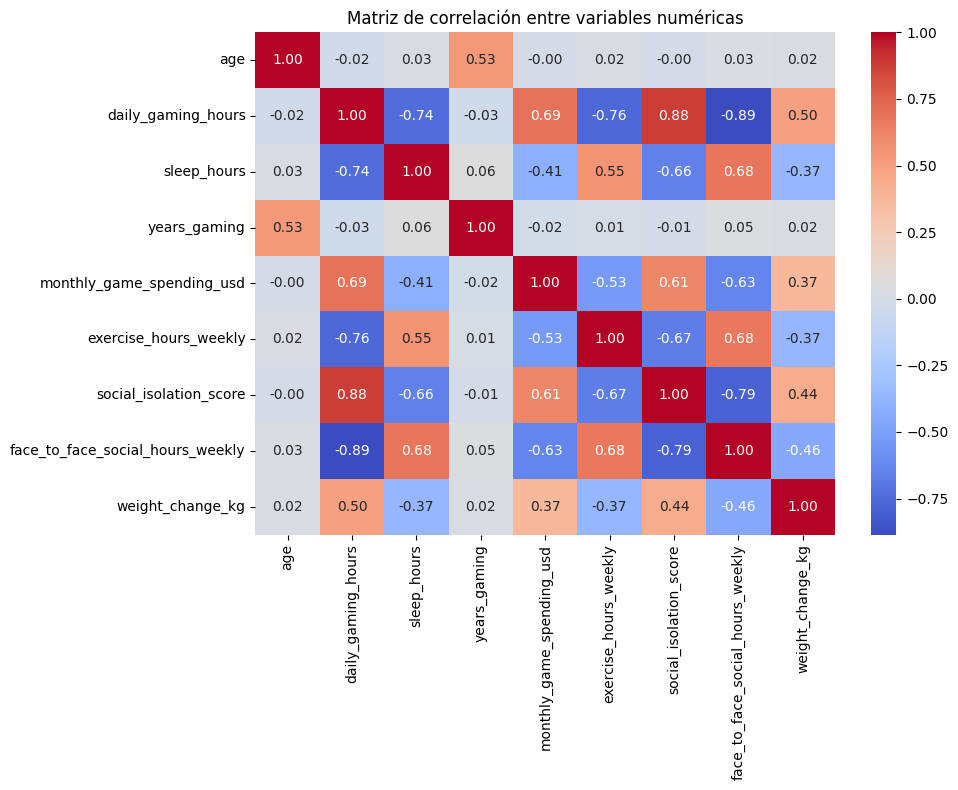

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'age',
    'daily_gaming_hours',
    'sleep_hours',
    'years_gaming',
    'monthly_game_spending_usd',
    'exercise_hours_weekly',
    'social_isolation_score',
    'face_to_face_social_hours_weekly',
    'weight_change_kg'
]

corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

El análisis de las relaciones entre variables revela una estructura clara de cómo el comportamiento de juego impacta el estilo de vida del usuario:
* Impacto Multidimensional del Juego: La matriz de correlación identifica a daily_gaming_hours como el eje central del análisis. Existe una correlación positiva muy fuerte con el social_isolation_score (0.88) y una correlación negativa drástica con las face_to_face_social_hours (-0.89). Esto confirma que, a medida que aumentan las horas de juego diarias, el aislamiento social percibido se dispara mientras que las interacciones físicas desaparecen casi proporcionalmente.
* Deterioro de Hábitos de Salud: El tiempo de juego también impacta negativamente en la salud física, mostrando una correlación inversa significativa con las horas de sueño (-0.74) y el ejercicio semanal (-0.76). Además, el aumento de horas de juego está vinculado a un incremento en el weight_change_kg (0.50), sugiriendo un estilo de vida más sedentario en los jugadores intensivos.
* Perfil Socioeconómico y Riesgo: El gasto mensual (monthly_game_spending_usd) presenta una correlación moderada-alta con las horas de juego (0.69) y el aislamiento (0.61), indicando que los usuarios con mayor riesgo de adicción tienden a invertir más recursos financieros en el ecosistema digital, posiblemente como refuerzo de su aislamiento social.

* Factores Psicológicos y de Descanso: Las gráficas bivariadas subrayan que los estados de ánimo como la ansiedad e irritabilidad y una calidad de sueño "Very Poor" o "Poor" son predictores visuales claros de los niveles de riesgo "Severe" y "High". Por el contrario, los usuarios que reportan un estado de ánimo "Normal" o una calidad de sueño "Good" se mantienen casi exclusivamente en el nivel de riesgo bajo.

###**Tratamiento de valores perdidos**

Antes de construir los pipelines de preprocesamiento, es importante analizar la presencia de valores faltantes en el conjunto de datos. La identificación de valores nulos permite definir una estrategia adecuada de imputación y evitar problemas durante el entrenamiento del modelo.

En este dataset, algunas variables como grades_gpa y work_productivity_score presentan valores faltantes, mientras que la mayoría de las demás columnas están completas. Para visualizar la cantidad de valores faltantes por columna, se utiliza un gráfico de barras.

Este análisis permitirá determinar si es necesario imputar valores, eliminar columnas o aplicar estrategias diferenciadas según el tipo de variable.

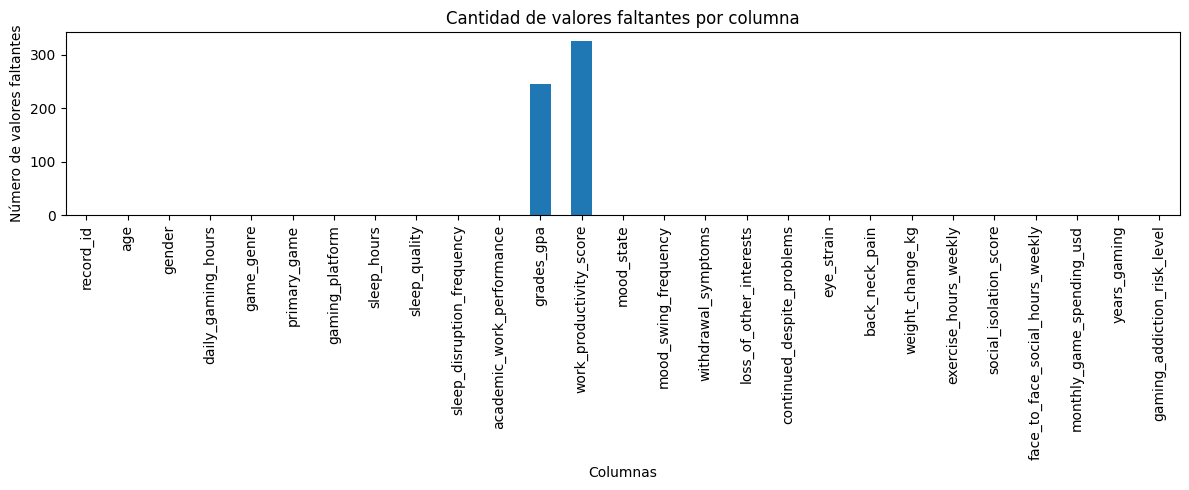

In [10]:
import matplotlib.pyplot as plt

missing_counts = data.isnull().sum()

plt.figure(figsize=(12, 5))
missing_counts.plot(kind='bar')
plt.title('Cantidad de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores faltantes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


También se puede calcular el porcentaje de los valores faltantes para cada columna, para entender mejor la información faltante.

In [11]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

,0
work_productivity_score,32.6
grades_gpa,24.6
record_id,0.0
daily_gaming_hours,0.0
game_genre,0.0
primary_game,0.0
gaming_platform,0.0
sleep_hours,0.0
sleep_quality,0.0
age,0.0


Al evaluar la calidad del conjunto de datos, se observa que la gran mayoría de las variables presentan una integridad perfecta, con un 0.0% de valores nulos. Esto incluye dimensiones críticas como el comportamiento de juego, indicadores de salud, estado de ánimo y la variable objetivo (gaming_addiction_risk_level), lo que garantiza una base sólida para el análisis bivariado y multivariado realizado anteriormente.

Sin embargo, se han identificado dos excepciones importantes en variables relacionadas con el rendimiento y la productividad:
* work_productivity_score: Es la columna con mayor ausencia de datos, presentando un 32.6% de valores faltantes.
* grades_gpa: Muestra una ausencia del 24.6% de los registros.

Esta carencia de información en ambas columnas probablemente se deba a la naturaleza demográfica de la muestra. Como observamos en la distribución de edad, la mayor parte de los usuarios son jóvenes de entre 18 y 22 años; es muy probable que los valores nulos en work_productivity_score correspondan a estudiantes que aún no forman parte del mercado laboral, mientras que los nulos en grades_gpa podrían pertenecer a individuos que no están actualmente enrolados en instituciones académicas o que prefirieron no compartir dicha información.

##**Preprocesamiento Pipeline**
Ahora que hemos analizado el conjunto de datos y comprendido las relaciones entre el comportamiento de juego y el riesgo de adicción, podemos proceder a construir los pipelines de preprocesamiento para las variables numéricas y categóricas.

El uso de pipelines permite aplicar transformaciones de manera estructurada, reproducible y sin fugas de información, lo cual es fundamental antes de entrenar modelos de clasificación. Además, garantiza que las mismas transformaciones aplicadas al conjunto de entrenamiento se utilicen posteriormente en el conjunto de prueba y en la integración con la aplicación móvil.

Para este propósito, utilizamos ColumnTransformer, que permite aplicar diferentes transformaciones a distintos subconjuntos de columnas. Cada transformación se define como un pipeline independiente mediante Pipeline.

###**Transformaciones definidas**
**Variables numéricas**

Incluyen características relacionadas con intensidad de juego, salud física y social.

* age

* daily_gaming_hours

* sleep_hours

* years_gaming

* monthly_game_spending_usd

* exercise_hours_weekly

* social_isolation_score

* face_to_face_social_hours_weekly

* weight_change_kg

* grades_gpa

* work_productivity_score

Las variables grades_gpa y work_productivity_score presentan valores faltantes, por lo que se imputarán utilizando la mediana. Posteriormente, todas las variables numéricas serán escaladas utilizando StandardScaler, ya que algunos modelos como SVM o Regresión Logística son sensibles a la magnitud de las variables.

**Variables categóricas**

Incluyen características demográficas, emocionales y de comportamiento.

* gender

* game_genre

* gaming_platform

* sleep_quality

* sleep_disruption_frequency

* academic_work_performance

* mood_state

* mood_swing_frequency

Estas variables serán imputadas con el valor más frecuente en caso de valores faltantes y posteriormente transformadas mediante OneHotEncoder, permitiendo que los modelos numéricos puedan interpretarlas correctamente.

**Variables excluidas**

* record_id se eliminará por no aportar valor predictivo.

* primary_game se excluye debido a su alta cardinalidad y bajo valor explicativo general.

* gaming_addiction_risk_level no se incluye en el pipeline ya que corresponde a la variable objetivo.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Columnas numéricas
numerical_cols = [
    'age',
    'daily_gaming_hours',
    'sleep_hours',
    'years_gaming',
    'monthly_game_spending_usd',
    'exercise_hours_weekly',
    'social_isolation_score',
    'face_to_face_social_hours_weekly',
    'weight_change_kg',
    'grades_gpa',
    'work_productivity_score'
]

# Columnas categóricas
categorical_cols = [
    'gender',
    'game_genre',
    'gaming_platform',
    'sleep_quality',
    'sleep_disruption_frequency',
    'academic_work_performance',
    'mood_state',
    'mood_swing_frequency'
]

# Pipeline para variables numéricas
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='drop'
)


###**Definición de variables y división del conjunto de datos**

Ahora procedemos a definir la matriz de características X y el vector objetivo y, así como a dividir el conjunto de datos en entrenamiento y prueba. Utilizaremos una partición 80–20, donde el 80 % de los datos se empleará para entrenar el modelo y el 20 % restante para evaluarlo.

En nuestro caso, la variable objetivo será work_productivity_score, ya que representa el nivel de productividad asociado a los hábitos de gaming y sueño.

Las variables explicativas incluyen tanto características numéricas como categóricas previamente analizadas:

* Numéricas: age, daily_play_time_hours, sleep_hours, grades_gpa

* Categóricas: gender, game_genre, gaming_platform, sleep_quality, sleep_disruption_frequency, mood_state

Es importante destacar que work_productivity_score se excluye de la matriz de características para evitar fuga de información (data leakage).

In [13]:
from sklearn.model_selection import train_test_split

# Matriz de características y variable objetivo
X = data[numerical_cols + categorical_cols]
y = data['gaming_addiction_risk_level']

# División 80%-20%
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Dado que se trata de un problema de clasificación, verificamos que la distribución de las clases sea similar en ambos conjuntos mediante gráficos de conteo.

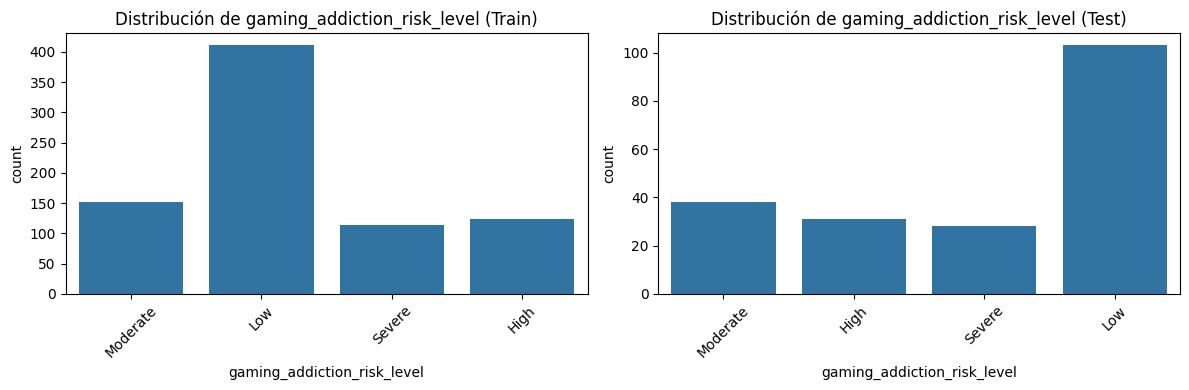

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Distribución de gaming_addiction_risk_level (Train)')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Distribución de gaming_addiction_risk_level (Test)')
axs[1].tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


Ahora aplicamos el pipeline definido previamente:

* fit_transform() solo en entrenamiento

* transform() en prueba

In [15]:
# Ajustar el pipeline con el conjunto de entrenamiento
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Transformar el conjunto de prueba
X_test_processed = preprocessing_pipeline.transform(X_test)

X_train_processed

array([[-0.33723298,  0.32894197, -0.44411103, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64380841, -0.52312893,  0.37641743, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39854806, -0.52312893,  0.17128531, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.33723298,  0.43119048,  0.03453057, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.39854806, -0.2163834 ,  0.17128531, ...,  0.        ,
         0.        ,  0.        ],
       [-0.82775367, -0.18230057,  0.37641743, ...,  1.        ,
         0.        ,  0.        ]])

In [16]:
x_test_processed = preprocessing_pipeline.transform(X_test)
x_test_processed

array([[ 0.88906875, -0.14821773, -0.0338468 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.58249332,  0.66977033, -1.05950737, ...,  0.        ,
         0.        ,  0.        ],
       [-1.07301401, -0.01188639, -0.30735628, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.87011014,  1.65817257, -1.67490371, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33723298, -1.23886848,  1.12856851, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09197263, -1.13661997,  1.67558748, ...,  0.        ,
         0.        ,  0.        ]])

##**Construir Modelo Clasificación**
La variable objetivo gaming_addiction_risk_level representa el nivel de riesgo de adicción al juego, con categorías como Low, Moderate, High y Severe.

Dado que se trata de un problema de clasificación multiclase y existe cierto desbalance entre categorías, la accuracy por sí sola no es suficiente para evaluar el rendimiento del modelo. Esto se debe a que el accuracy solo mide el porcentaje total de predicciones correctas, sin diferenciar los tipos de error (falsos positivos y falsos negativos) en cada clase.

En este escenario, es importante un balance entre:

* Precision: de todos los usuarios que el modelo predice en una categoría de riesgo, cuántos realmente pertenecen a esa categoría.

* Recall: de todos los usuarios que realmente pertenecen a una categoría, cuántos son correctamente identificados por el modelo.

Por lo tanto, se selecciona F1-score (macro o ponderado) como métrica principal de evaluación, ya que combina precision y recall, asegurando que el modelo no favorezca únicamente a las clases más frecuentes.

Durante el proceso de optimización mediante GridSearchCV, se busca maximizar el F1-score para encontrar los mejores hiperparámetros de cada modelo.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_lr = {"C": [0.01, 0.1, 1, 10]}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    param_grid_lr,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_lr.fit(X_train_processed, y_train)
best_lr = grid_lr.best_estimator_
print("Mejores parámetros LR:", grid_lr.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejores parámetros LR: {'C': 10}


In [18]:
# Random Forest
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_rf.fit(X_train_processed, y_train)
best_rf = grid_rf.best_estimator_
print("Mejores parámetros RF:", grid_rf.best_params_)

Mejores parámetros RF: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
# SVM
param_grid_svm = {
    "C": [0.01, 0.1, 1],
    "kernel": ["linear", "rbf"]
}

grid_svm = GridSearchCV(
    SVC(),
    param_grid_svm,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_svm.fit(X_train_processed, y_train)
best_svm = grid_svm.best_estimator_
print("Mejores parámetros SVM:", grid_svm.best_params_)

Mejores parámetros SVM: {'C': 0.1, 'kernel': 'linear'}


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Función para evaluar modelos multiclase
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, average="weighted"),
        "Recall": recall_score(y, y_pred, average="weighted"),
        "F1-score": f1_score(y, y_pred, average="weighted")
    }

# Comparación de los modelos en el conjunto de prueba
results = pd.DataFrame({
    "Logistic Regression": evaluate_model(best_lr, X_test_processed, y_test),
    "Random Forest": evaluate_model(best_rf, X_test_processed, y_test),
    "SVM": evaluate_model(best_svm, X_test_processed, y_test)
}).T

results


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.665,0.632332,0.665,0.645316
Random Forest,0.690,0.673993,0.690,0.672920
SVM,0.685,0.668995,0.685,0.673680


In [21]:
# Mejor moledo segun F1
best_model_name = results["F1-score"].idxmax()
best_model_name

'SVM'

In [22]:
if best_model_name == "Logistic Regression":
    best_model = best_lr
elif best_model_name == "Random Forest":
    best_model = best_rf
else:
    best_model = best_svm

best_model

SVC(C=0.1, kernel='linear')

In [23]:
# Evaluación del mejor modelo en entrenamiento y prueba
train_metrics = evaluate_model(best_model, X_train_processed, y_train)
test_metrics = evaluate_model(best_model, X_test_processed, y_test)

# Comparación de métricas
comparison_df = pd.DataFrame({
    "Train": train_metrics,
    "Test": test_metrics
}).T

comparison_df

,Accuracy,Precision,Recall,F1-score
Train,0.75375,0.743241,0.75375,0.746896
Test,0.68500,0.668995,0.68500,0.673680


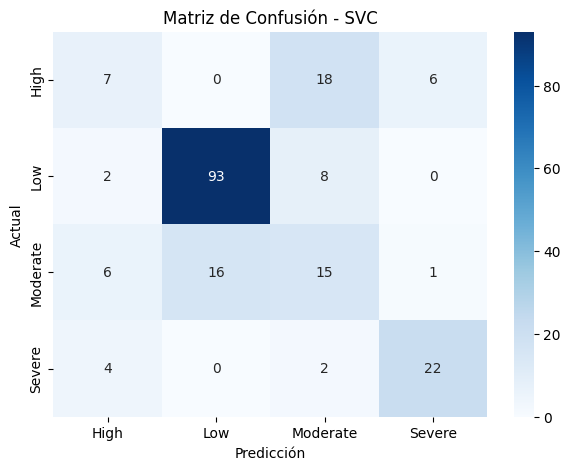

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Transformar X_test usando el pipeline
X_test_processed = preprocessing_pipeline.transform(X_test)

# Ahora sí predecimos con el mejor modelo
y_pred = best_model.predict(X_test_processed)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - SVC")
plt.show()

In [26]:
# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n")
print(report)

Reporte de Clasificación:

              precision    recall  f1-score   support

        High       0.37      0.23      0.28        31
         Low       0.85      0.90      0.88       103
    Moderate       0.35      0.39      0.37        38
      Severe       0.76      0.79      0.77        28

    accuracy                           0.69       200
   macro avg       0.58      0.58      0.57       200
weighted avg       0.67      0.69      0.67       200



##**Exportar Modelo con ONNX**

In [ ]:
!pip install skl2onnx

In [27]:
# Rellenamos NaN en categóricas con la moda
X_train_onnx = X_train.copy()
X_test_onnx = X_test.copy()

for col in categorical_cols:
    X_train_onnx[col] = X_train_onnx[col].fillna(X_train_onnx[col].mode()[0])
    X_test_onnx[col] = X_test_onnx[col].fillna(X_train_onnx[col].mode()[0])

# Rellenamos NaN en numéricas
for col in numerical_cols:
    X_train_onnx[col] = X_train_onnx[col].fillna(X_train_onnx[col].mean())
    X_test_onnx[col] = X_test_onnx[col].fillna(X_train_onnx[col].mean())

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Pipeline categórico
categorical_pipeline_onnx = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline numérico
numerical_pipeline_onnx = Pipeline([
    ('scaler', StandardScaler())
])

preprocessing_pipeline_onnx = ColumnTransformer([
    ('num', numerical_pipeline_onnx, numerical_cols),
    ('cat', categorical_pipeline_onnx, categorical_cols)
])

final_pipeline_onnx = Pipeline([
    ('preprocessing', preprocessing_pipeline_onnx),
    ('classifier', best_svm)
])

final_pipeline_onnx.fit(X_train_onnx, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'daily_gaming_hours',
                                                   'sleep_hours',
                                                   'years_gaming',
                                                   'monthly_game_spending_usd',
                                                   'exercise_hours_weekly',
                                                   'social_isolation_score',
                                                   'face_to_face_social_hours_weekly',
                                                   'weight_change_kg',
                                                   'grades_gpa',
                                                   'work_productivity_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'game_genre',
                                                   'gaming_platform',
                                                   'sleep_quality',
                                                   'sleep_disruption_frequency',
                                                   'academic_work_performance',
                                                   'mood_state',
                                                   'mood_swing_frequency'])])),
                ('classifier', SVC(C=0.1, kernel='linear'))])

In [29]:
from skl2onnx import to_onnx
from skl2onnx.common.data_types import FloatTensorType, StringTensorType

initial_types = [(col, FloatTensorType([None, 1])) for col in numerical_cols] + \
                [(col, StringTensorType([None, 1])) for col in categorical_cols]

onx = to_onnx(
    final_pipeline_onnx,
    initial_types=initial_types,
    target_opset=12,
    options={id(final_pipeline_onnx): {'zipmap': False}}
)

with open("gaming_addiction_svc.onnx", "wb") as f:
    f.write(onx.SerializeToString())
print("Modelo ONNX exportado correctamente!")


Modelo ONNX exportado correctamente!


##**Final Remarks**
El modelo SVM muestra un desempeño desigual según la clase de riesgo de adicción al juego. Esto refleja la dificultad del algoritmo para separar con claridad los niveles intermedios, aunque es bastante efectivo en los extremos del espectro.

* Riesgo Bajo (Low):
Esta clase es la mejor identificada, con precisión de 0.85 y recall de 0.90. Esto significa que el modelo reconoce correctamente a la mayoría de jugadores de bajo riesgo y comete pocos errores de clasificación. Los patrones de estos usuarios son claros y consistentes, lo que facilita la predicción.

*  Riesgo Severo (Severe):
La detección de casos severos también es relativamente buena (precision 0.76, recall 0.79), lo que permite identificar a usuarios que podrían requerir alertas o intervenciones inmediatas.

* Niveles Intermedios (High y Moderate):
Aquí el modelo muestra limitaciones:

  * High: precision 0.37 y recall 0.23, con muchos casos confundidos como Moderate.

  * Moderate: precision 0.35 y recall 0.39, con tendencia a clasificarlos como Low.
Esto indica que el modelo encuentra difícil distinguir los matices de riesgo medio, probablemente porque los patrones de comportamiento son más similares entre estas clases.

Implicaciones para la aplicación Flutter:

* El modelo es confiable para alertar sobre casos críticos (Severe) o confirmar hábitos saludables (Low).
* Para los usuarios intermedios, se recomienda tratar las predicciones con precaución, y considerar estrategias adicionales como recordatorios de seguimiento o la incorporación de nuevas variables que ayuden a diferenciar mejor los niveles de riesgo medio.

Resumen de métricas generales:
* Exactitud global: 0.69
* F1-score macro: 0.57 (refleja la dificultad en clases minoritarias)
* F1-score ponderado: 0.67